In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)

        self.fc1 = nn.Linear(16 * 6 * 6, 120) # 6*6 image dimenesion
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2)) # Max pooling over a (2,2) window
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) # same function as above line; assumes square if only 1 number provided for window
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

    
    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *=s

        return num_features

In [4]:
net = LeNet()
print(net)

input = torch.rand(1, 1, 32, 32)
print(f"Image batch shape : \n {input.shape}")

output = net(input)
print("Raw Output")
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Image batch shape : 
 torch.Size([1, 1, 32, 32])
Raw Output
tensor([[ 0.0618,  0.0070, -0.0551,  0.0292, -0.0812,  0.0937,  0.0236, -0.0479,
          0.1078, -0.1037]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


In [8]:
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

In [9]:
transform =  transforms.Compose(
    [transforms.ToTensor(), # transform img to pytorch tensors
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # avg -> 0, std_dvtn -> 0.5

In [10]:
trainset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data


/home/aknova/anaconda3/envs/exp_ml/lib/python3.12/site-packages/torchvision/datasets/cifar.py:83: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  entry = pickle.load(f, encoding="latin1")


In [11]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

 ship   car  deer   cat


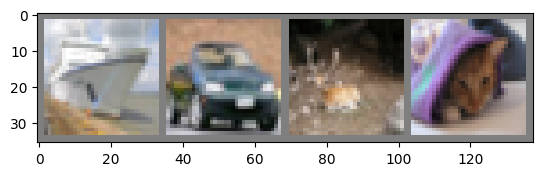

In [14]:
import matplotlib.pyplot as plt
import numpy as np

classes = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

data_iter = iter(trainloader)
images, labels = next(data_iter)

imshow(torchvision.utils.make_grid(images))
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))